In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

### OUTLINE / INTRODUCTION

I denne notebooken gir jeg svar på oppgavene. Unntaket er den første oppgaven (Task 0), som ligger i en separat PDF. Oppgavene besvares i all hovedsak under oversriften "Mini-batch (Stochastic) Gradient Descent", så hopp gjerne rett til den. Grunnen til at jeg har med to løsninger er at jeg først løste oppgaven ved hjelp av "vanlig" Stochstic Gradient Descent – der man kun velger én av observasjonene. Dette har jeg bedre kjennskap til fra før, så jeg startet her – deretter utvidet jeg til en mini-batch løsning slik det etterspørres i oppgaven. 

Notebooken er strukturert som følger:
1. I Del 1 en gir jeg et raskt overblikk over den generelle algoritmen for Gradient Descent som jeg har fulgt i løsningen
2. I Del 2 genereres det dummy-data som kan brukes til å vurdere/evaluere modellen(e)
3. I Del 3 bygges et program som løser oppgaven ved hjelp av "vanlig" Stochastic gradient descent
4. I Del 4 bygges et program som løser oppggaven ved hjelp av mini-batch stochastic gradient descent. Denne gir svar på Task 3, 5 og 6.
5. Del 5 gir en funksjon som produserer jacobian, slik det etterspørres i Task 4.

## 1) Genral approach/algorithm that I've followed in the solution
1. Take the gradient of the loss-function 
2. Pick random starting values for the parameters that are to be estimated
3. Caculate the gradient with the current values
4. Calculate the value for the next step: old_value - learning_rate*gradient(current_values)
5. Back to step 3.

## 2) Generating some dummy-data
For testing/verifying

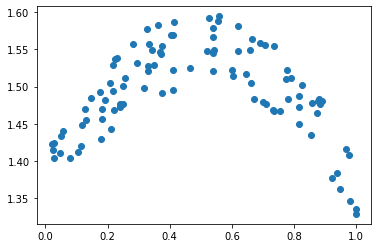

In [2]:
# True values of the parameters - what I'm trying to estimate later
c_true = 1.5
mu_true = 0.5

# Genrating some input and outout data, last term adds 
X = np.random.rand(100,1)
y = c_true*(np.exp(-((X-mu_true)**2)/2)) + np.random.rand(100,1)/10
plt.plot(X, y, 'o')

## 3) Stochastic Gradient Descent
Picking a single value from the data for each step in the algorithm 

In [3]:
###############################################################################################
### 1) HELPER FUNCTIONS
###############################################################################################

# 1.1) Function giving av value/vektor of the estimated y's given the current parameters SECTION 3 IN THE TEST
def f(c,mu,x_vector):
    return c*(np.exp(-((x_vector-mu)**2)/2))


# 1.2 Gradient functions (SECTION 5 IN THE TEST)
# 1.2.1) Function returning the gradient of the loss-function with respect to the parameter mu
def gradient_mu(c,mu,x_vector,y_vector):
    N = len(x_vector)
    return 2*(f(c,mu,x_vector) - y_vector) * c *(np.exp(-((x_vector-mu)**2)/2))*(x_vector-mu)/2

# 1.2.2) Function returning the gradient of the loss-function with respect to the parameter c
def gradient_c(c,mu,x_vector,y_vector):
    N = len(x_vector)
    return 2*(f(c,mu,x_vector) - y_vector) * np.exp(-((x_vector-mu)**2)/2) #/ N

###############################################################################################
### 2) STOCHASTIUC GRADIENT DESCENT FUNCTIION
###############################################################################################

def stochastic_gradient_descent(x_vector, y_vector, learning_rate = 0.01, max_num_steps = 1000):    
    # Pick random starting values for the parameters c and mu
    c = np.random.uniform(0,1,1)
    mu = np.random.uniform(0,1,1)
    
    steps = 0
    while steps < max_num_steps:
        
        # Stochastic element - picking single values for x,y for stochastic gradient descent
        permutation = np.random.permutation(len(x_vector))
        x = x_vector[permutation][0]
        y = y_vector[permutation][0]
        
        # Calculating new parameters for next step
        c = c - learning_rate*gradient_c(c,mu,x,y)
        mu = mu - learning_rate*gradient_mu(c,mu,x,y)
        
        # Updating steps (adding 1)
        steps += 1
    
    return (c,mu)

### Running the model: 

In [4]:
SGD = stochastic_gradient_descent(X,y)
print(f"Real c-value: {c_true} \nReal c-value: {mu_true} \nEstimated c-value: {float(SGD[0])} \nEstimated c-value: {float(SGD[1])}")

Real c-value: 1.5 
Real c-value: 0.5 
Estimated c-value: 1.562092667994107 
Estimated c-value: 0.5018793967736604


## 4) Mini-batch (Stochastic) Gradient Descent
Selecting a random batch of the data for each step-calculation

In [5]:
###############################################################################################
### 1) HELPER FUNCTIONS
###############################################################################################

# 1.1) Function giving av value/vector of the estimated y's given the current parameters (same as above)
def f(c,mu,x_vector):
    return c*(np.exp(-((x_vector-mu)**2)/2))

# 1.2 Gradient functions. These differs from the ones above in that they calculate the average gradients for all the observations in the vector (given by N)
# 1.2.1) Function returning the gradient of the loss-function with respect to the parameter mu
def gradient_c(c, mu, x_vector, y_vector):     
    N = len(y_vector)
    gradient = 0
    for x, y in zip(x_vector, y_vector):
        gradient += 2*(f(c, mu, x) - y) * np.exp(-((x-mu)**2)/2)
    return gradient/N

# 1.2.1) Function returning the gradient of the loss-function with respect to the parameter mu
def gradient_mu(c, mu, x_vector, y_vector):         
    N = len(y_vector)
    gradient = 0
    for x,y in zip(x_vector, y_vector):
        gradient += 2*(f(c, mu, x) - y) * c *(np.exp(-((x-mu)**2)/2))*(x-mu)/2
    return gradient/N

###############################################################################################
### 2) MINI-BATCH (STOCHASTIC) GRADIENT DESCENT FUNCTIION
###############################################################################################

def mini_batch_gradient_descent(x_vector, y_vector, learning_rate = 0.01, runs = 1000, batch_size=100):  
   # Pick random starting values for the parameters c and mu
    c = np.random.uniform(0,1,1)
    mu = np.random.uniform(0,1,1)
    
    # Stochastic element - picking batch of values from the data
    permutation = np.random.permutation(len(x_vector))
    x = x_vector[permutation][0:batch_size]
    y = y_vector[permutation][0:batch_size]    
    
     # Calculating new parameters
    for i in range(runs):
        c -= learning_rate*gradient_c(c,mu,x,y)
        mu -= learning_rate*gradient_mu(c,mu,x,y)
    
    return (c,mu)

### Running the model

In [6]:
MBGD = mini_batch_gradient_descent(X,y)
print(f"Real c-value: {c_true} \nReal c-value: {mu_true} \nEstimated c-value: {float(MBGD[0])} \nEstimated c-value: {float(MBGD[1])}")

Real c-value: 1.5 
Real c-value: 0.5 
Estimated c-value: 1.5550759341543965 
Estimated c-value: 0.47176641105699385


## 5) Jacobian
Matrix with values for the first dirivatives -  Section 4 answer 

In [7]:
# Since I used a somewhat different approach I never calculated the jacobian explicitly. Here I present a function returning the jacobian as asked in section 5
def jacobian_matrix(x_vector, c, mu):
    return np.hstack([
        c*(np.exp(-((x_vector-mu)**2)/2))*(x_vector-mu)/2    # derivitve of f with respect to c (param 1)
        , np.exp(-((x_vector-mu)**2)/2)                      # derivitve of f with respect to mu (param 2)
    ])

In [8]:
## With example estimates for the parameters:
J_c = 0.8
J_mu = 0.2

jacobian_matrix(X, J_c, J_mu)

array([[ 0.12903438,  0.94319011],
       [ 0.01626879,  0.99917187],
       [-0.04766666,  0.9928225 ],
       [ 0.23234203,  0.72629149],
       [ 0.21501379,  0.79621174],
       [-0.06101842,  0.98815495],
       [ 0.06623605,  0.98599674],
       [ 0.08182157,  0.97838117],
       [-0.0706072 ,  0.98403997],
       [ 0.06830338,  0.98508835],
       [ 0.13417928,  0.93806352],
       [-0.00665479,  0.99986158],
       [ 0.16586553,  0.89911012],
       [ 0.00965177,  0.99970876],
       [ 0.2115516 ,  0.80654787],
       [-0.0083728 ,  0.99978085],
       [ 0.17665843,  0.88223156],
       [ 0.19804749,  0.84082541],
       [ 0.12835603,  0.94384449],
       [ 0.16899423,  0.89444214],
       [-0.03386024,  0.99639769],
       [ 0.14861089,  0.92202477],
       [ 0.1277829 ,  0.94439355],
       [ 0.05119415,  0.9917069 ],
       [ 0.19612446,  0.84509386],
       [ 0.04712824,  0.99298546],
       [ 0.03215582,  0.99675296],
       [-0.02904428,  0.99735334],
       [ 0.23229958,